# INFS770
## Assignment 4
### Kevin Kuipers 
#### 04/21/2020

### Mining Text Data

# Q1

##### To begin I have a data set consisting of reviews. The features in the data set are:
##### pid - Product ID
##### helpful - Score from 0-5  of the helpfulness rating by other user of this review
##### score  - Score from 0-5 of the product rating associated with this review
##### text - the text content of the review
##### category - the category of the review, e.g. watch, electronics, etc.

##### I will begin by loading the data set into a pandas dataframe. Then I will print the first five rows to ensure it was loaded correctly. For the last part I will outpt the distribution counts of the variable "score" and "category".


In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
#loading the amazon_review_texts.csv as a DataFrame
df = 'amazon_review_texts.csv'

df = pd.DataFrame(pd.read_csv(df, sep=',', header=0))

#outputting the first five rows of the dataframe
df.head(5)

,pid,helpful,score,text,category
0,B000GAYQL8,0/0,5,GREAT WATCH AND GREAT LOOK. BIG FACE AND 4 DIF...,watch
1,B000IBNPDA,0/0,5,"Bought this as a Christmas gift, my boyfriend ...",watch
2,B000J2HA16,0/0,5,"I love this watch! Its sporty, without looking...",watch
3,B000BDIQPM,0/0,5,"Works great,looks nice,dont have to worry abou...",watch
4,B000GZTH9E,0/3,4,I need to change the watch wrist and I havent ...,watch


Populating the interactive namespace from numpy and matplotlib
5    2070
4     773
1     595
3     303
2     259
Name: score, dtype: int64


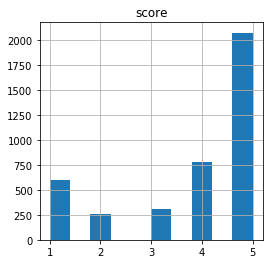

In [3]:
%pylab inline
df.hist(figsize=(4,4))
print(df['score'].value_counts())

electronics    1000
watch          1000
software       1000
automotive     1000
Name: category, dtype: int64


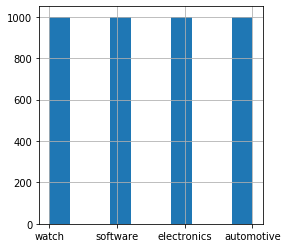

In [4]:
df['category'].hist(figsize=(4,4))
print(df['category'].value_counts())


##### It appears for score the distribution is pretty skewed. Most of the review scores are 5 and then 4. For category, there is 1000 instances for each category (watch, software, electronics, automative)

# Q2

## Preprocessing and claculate token frequency

##### The next step is to tokenize the review. The process will do the following:

##### 1 ) Lower case the tokens
##### 2 ) remove stop words using nltk library
##### 3 ) stemming using the nltk library
##### 4 ) Remove punctuations
##### 5 ) Remove numbers


In [5]:
# Obtaining stopwords
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

import re
def before_token(documents):
    # 1 Converting words to lower case
    lower = map(str.lower, documents)
    # 4 Removre Punctuations
    punctuationless = list(map(lambda x: " ".join(re.findall('\\b\\w\\w+\\b',x)), lower))
    # 5 Remove Numbers
    return list(map(lambda x:re.sub('\\b[0-9]+\\b', '', x), punctuationless))

# 3 Stemmer
stemmer = nltk.stem.PorterStemmer()

# Token Frequency
fdist = nltk.FreqDist()


# tokenization
def preprocess(doc):
    tokens = []
    for token in doc.split():
        if token not in stopwords:
            tokens.append(stemmer.stem(token))
    return tokens
            
# preprocess all documents for the text feature (reviews)
processed = list(map(preprocess, before_token(df['text'])))
print(processed[5])

['much', 'glorious', 'inexpens', 'item', 'stark', 'minim', 'probabl', 'would', 'qualifi', 'fashion', 'statement', 'simpl', 'white', 'face', 'black', 'numer', 'rel', 'attract', 'comic', 'san', 'typefac', 'watch', 'strap', 'rubber', 'buy', 'whole', 'watch', 'cheaper', 'buy', 'new', 'strap', 'case', 'gave', 'star', 'anyth', 'rave', 'watch']


## Token Frequency
##### Now lets look at the token frequency using the FreqDist function which takes a list of tokens and return a dict containing unique items and frequency

In [6]:
fdist = nltk.FreqDist([token for doc in processed for token in doc])

print("Unique tokens: %d" % fdist.B())
print('Total tokens: %d' % fdist.N())
print('Tokens occured only once: %d' % len(fdist.hapaxes()))
print('Token that occurs the most: %s' % fdist.max())

Unique tokens: 10973
Total tokens: 193927
Tokens occured only once: 4701
Token that occurs the most: watch


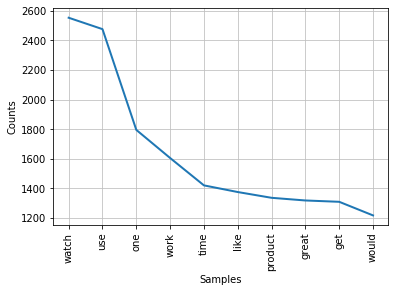

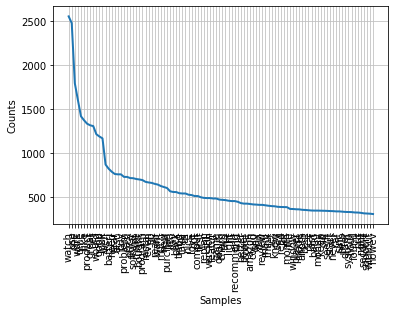

In [7]:
"%matplotlib inline"
fdist.plot(10)
fdist.plot(100)

## Top 10 frequently occuring tokens

In [8]:
fdist.tabulate(10)

  watch     use     one    work    time    like product   great     get   would 
   2553    2476    1795    1605    1420    1375    1336    1318    1309    1217 


##### Use, one, product, would, and work do not seem like they would be very helpful in clustering. These words can be used in any category and I do not think would be helpful in clustering. Watch and time make sense because I would speculate that they would get clustered under the watch category..  

# Q3
##### Now I will reconstruct the documents and vectorize all the documents using TfidfVectorizer using norm='l2. I will also remove tokens that appear in over 80% of the documents. During this process I will remove stopwords again. Normalization is needed for clustering the data

In [9]:
processed_doc = list(map(" ".join, processed))


from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

#Normalize the data for clustering
vectorizer = TfidfVectorizer(max_df=.8, stop_words='english', norm='l2')
X = vectorizer.fit_transform(processed_doc)

print("Number of samples: %d, Number of features : %d" % X.shape)

Number of samples: 4000, Number of features : 10833


# Q4

##### Since the data has been preprocessed and normalized lets use K-means clustering to categorize the documents into 4 clusters. I will output the top 10 representative words for each cluster. 

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, max_iter=100, random_state=712)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=712, tol=0.0001, verbose=0)

In [11]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
    print('Clsuter %d:' % i)
    for ind in order_centroids[i, :10]:
        print(' %s ' % terms[ind])
    print

Clsuter 0:
 watch 
 look 
 band 
 time 
 great 
 wear 
 love 
 like 
 nice 
 year 
Clsuter 1:
 product 
 work 
 great 
 use 
 batteri 
 good 
 charg 
 fit 
 price 
 charger 
Clsuter 2:
 bed 
 air 
 inflat 
 comfort 
 pump 
 sleep 
 mattress 
 deflat 
 airb 
 easi 
Clsuter 3:
 program 
 softwar 
 use 
 game 
 version 
 comput 
 product 
 work 
 instal 
 window 


##### It looks like the K-means clustering did a good job clustering 2 of the categories. For example, cluster 0 can be identified as watches. Cluster 3 can be identified as software, computer, applications. Cluster 1 and 2 can be difficult to label. Cluster 2 has words that could be associated with automotive or electronics. However, based on cluster 2 results, I would have to label cluster 1 as automotive and cluster 2 as electronics. 

# Q5

##### Now I will build a topic model using Laten Dirichlet Allocation (LDA) from the vectorized data. I will set the number of topics to 4. I will also look at the words for each topic. . This will be done to see how it compares to K-Means Clustering model. 

In [12]:
import gensim
from gensim.models import LdaModel, LsiModel

corpus = gensim.matutils.Sparse2Corpus(X)
id2word = dict((v,k) for k,v in vectorizer.vocabulary_.items())
lda = LdaModel(corpus, num_topics=4, id2word=id2word, passes = 100, random_state=712)

lda.print_topics()

[(0,
  '0.003*"collag" + 0.001*"civic" + 0.001*"blunt" + 0.001*"bind" + 0.001*"coreldraw" + 0.001*"brrr" + 0.001*"bmw" + 0.001*"clumsi" + 0.001*"3b" + 0.001*"128kbp"'),
 (1,
  '0.002*"bullock" + 0.001*"bronz" + 0.001*"ep" + 0.001*"dispos" + 0.001*"fort" + 0.001*"dude" + 0.001*"fifth" + 0.001*"copi" + 0.001*"everth" + 0.001*"cirru"'),
 (2,
  '0.001*"30min" + 0.001*"2007a" + 0.001*"cockey" + 0.001*"begginn" + 0.001*"bravia" + 0.001*"discoveri" + 0.001*"basin" + 0.001*"avaial" + 0.001*"aluminim" + 0.001*"ad"'),
 (3,
  '0.002*"extraordinari" + 0.002*"flytrap" + 0.002*"claymat" + 0.001*"batterycon" + 0.001*"bounc" + 0.001*"coher" + 0.001*"benefit" + 0.001*"bathroom" + 0.001*"delibertli" + 0.001*"exterior"')]

##### Besides topic 0, none of the the words I feel like describe the 4 product categories. Topic 0, is clearly defined as automotive with words like 'civic' and 'bmw'. When comparing this to Kmeans model, I think Kmean did a MUCH better job clustering the data. 

# Q6


##### Now Lets look at using SGD classifier to predict review score using texts. I will use 5-fold cross validation and output the classification report for each of the 5 folds. This will include the precision, recall, f1-score, and support by class. At the very end of it the average f1-score across the 5 folds will be outputted. First I will use TFIDF to vectorize the data set again. The following will be done:
##### |
##### Remove tokens that appear in over 80% of the documents
##### Remove those that appear in just 1 document
##### Remove english stopwords
##### Print the number of features obtained

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

vectorizer_2 = TfidfVectorizer(tokenizer=preprocess, max_df=.8, stop_words='english', min_df=2)
X_2 = vectorizer_2.fit_transform(processed_doc)
df_2 = pd.DataFrame(X_2.todense(), columns=vectorizer_2.get_feature_names())

print("Number of samples: %d, Number of features : %d" % X_2.shape)



C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Number of samples: 4000, Number of features : 5668


In [14]:
#5-fold cross validation
skf = StratifiedKFold(n_splits=5,random_state=712, shuffle=True)
fold = 0
f1 = []
#creating a for loop for train_index, text_index in skf
for train_index, test_index in skf.split(df['text'], df['score']):
    fold += 1
    print("Fold %d" % fold)
    #paritioning the data set
    train_x, test_x = df['text'].iloc[train_index], df['text'].iloc[test_index]
    train_y, test_y = df['score'].iloc[train_index], df['score'].iloc[test_index]
    X_3 = vectorizer_2.fit_transform(train_x)
    print("Number of samples: %d, Number of features : %d" % X_3.shape)
    X_3test = vectorizer_2.transform(test_x)
    
    clf = SGDClassifier(random_state=fold)
    clf.fit(X_3, train_y)
    
    pred_y = clf.predict(X_3test)
    
    for line in metrics.classification_report(test_y, pred_y).split("\n"):
        print(line)
    f1.append(metrics.f1_score(test_y, pred_y, average='weighted'))
print("Average F1: %.2f" % np.mean(f1))

Fold 1
Number of samples: 3200, Number of features : 8870
              precision    recall  f1-score   support

           1       0.62      0.57      0.60       119
           2       0.29      0.20      0.24        51
           3       0.33      0.30      0.31        61
           4       0.47      0.39      0.42       155
           5       0.70      0.80      0.74       414

    accuracy                           0.61       800
   macro avg       0.48      0.45      0.46       800
weighted avg       0.59      0.61      0.59       800

Fold 2
Number of samples: 3200, Number of features : 8805
              precision    recall  f1-score   support

           1       0.64      0.69      0.66       119
           2       0.37      0.19      0.25        52
           3       0.38      0.20      0.26        60
           4       0.34      0.29      0.31       155
           5       0.68      0.78      0.73       414

    accuracy                           0.59       800
   macro avg   

##### The results, precision, recall, f1-score are very similar among each fold. It means the data is consistent among the folds. This indicates that the models are stable. The average F1-score is 0.58. The precision and recall scores relatively consistent among the folds. However, it seems predicion and recall are higher for predicting review score 5  and then review score 1. Precision and Recall tend the be pretty low for predicting review scores between 2-4. 

##### | 
##### Recall is the ratio betweem how many were correctly identified as positives to how many were actually postive. In this case the model's recall is roughly 60% among all the folds. 

##### |
##### Precision is how many were correctly classified as positive out all positive examples. In this case, among all positive examples the model has a precision of roughly 57% among all the folds. 

##### |
##### F1 score is the harmonic mean of recall and precision. This score is a better measure of the incorrectly classified cases than the accuracy score. When you want a good balance between recall and precision f1 helps provide that indication. In this case the average F1 score among the folds is 58%. 
    

# Q7

##### Now I will create a new variable called "satisfaction" based on the following criteria:
##### If review score is 4 or 5 then the satisfaction is 1
##### else the satisfaction will be score 0 
##### Then I do a 5-fold cross validation prediction satisfaction using an SGD classifier using the same vectorizer as in the previous section (Q6). I will output the same classification as in Q6. 

In [15]:
#Creating a function to assign the satisfaction based upon score in the data set
def sat_class(score):
    if score >= 4: 
        return 1
    else: 
        return 0
#Applying the function to the data frame   
df['satisfaction'] = df['score'].apply(sat_class)
#oputputting the first five rows
df.head()

,pid,helpful,score,text,category,satisfaction
0,B000GAYQL8,0/0,5,GREAT WATCH AND GREAT LOOK. BIG FACE AND 4 DIF...,watch,1
1,B000IBNPDA,0/0,5,"Bought this as a Christmas gift, my boyfriend ...",watch,1
2,B000J2HA16,0/0,5,"I love this watch! Its sporty, without looking...",watch,1
3,B000BDIQPM,0/0,5,"Works great,looks nice,dont have to worry abou...",watch,1
4,B000GZTH9E,0/3,4,I need to change the watch wrist and I havent ...,watch,1


In [16]:
skf_2 = StratifiedKFold(n_splits=5,random_state=712, shuffle=True)
fold_2 = 0
f1_2 = []

for train_index2, test_index2 in skf_2.split(df['text'], df['satisfaction']):
    fold_2 += 1
    print("Fold %d" % fold_2)
    #paritioning the data set
    train_2x, test_2x = df['text'].iloc[train_index2], df['text'].iloc[test_index2]
    train_2y, test_2y = df['satisfaction'].iloc[train_index2], df['satisfaction'].iloc[test_index2]
    X_4 = vectorizer_2.fit_transform(train_2x)
    print("Number of samples: %d, Number of features : %d" % X_4.shape)
    X_4test = vectorizer_2.transform(test_2x)
    
    clf = SGDClassifier(random_state=fold_2)
    clf.fit(X_4, train_2y)
    
    pred_2y = clf.predict(X_4test)
    
    for line in metrics.classification_report(test_2y, pred_2y).split("\n"):
        print(line)
    f1_2.append(metrics.f1_score(test_2y, pred_2y, average='weighted'))
print("Average F1: %.2f" % np.mean(f1_2))

Fold 1
Number of samples: 3200, Number of features : 8978
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       231
           1       0.85      0.88      0.86       569

    accuracy                           0.80       800
   macro avg       0.76      0.74      0.75       800
weighted avg       0.80      0.80      0.80       800

Fold 2
Number of samples: 3200, Number of features : 8872
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       231
           1       0.86      0.91      0.88       569

    accuracy                           0.83       800
   macro avg       0.80      0.77      0.78       800
weighted avg       0.82      0.83      0.83       800

Fold 3
Number of samples: 3200, Number of features : 8879
              precision    recall  f1-score   support

           0       0.73      0.68      0.71       231
           1       0.88      0.90      0.89       569

    accu

##### It appears the precision, recall, and f1 scores have increased significantly when using a binary response variable satisfaction based on review scores. 

# Q8

##### Now I perfom sentiment lexicon for classification. The following will be done:
##### Re-vectorize the texts again using the TFIDF vectorizer
##### Remove tokens that appear in over 80% of the documents
##### Remove those that appear in just 1 document
##### Remove english stopwords
##### Print the number of features obtained
##### Perform 5-fold cross validation with precision, recall, f1 score
##### Average f1-score across the folds. 

### Reading in the lexicon and assigning -1 for negative words, 1 for positive words

In [17]:
lexicon = dict()

# reading the negative words
with open(r'C:\\Users\Agent000\Documents\DSU\Classes\2020\Spring 2020\Assignments\Assignment 4\opinion-lexicon-English\negative-words.txt') as in_file:
    for line in in_file.readlines():
        if not line.startswith(';') and line != '\n':
            lexicon[line.strip()] = -1
            
# reading positive words            
with open(r'C:\\Users\Agent000\Documents\DSU\Classes\2020\Spring 2020\Assignments\Assignment 4\opinion-lexicon-English\positive-words.txt') as in_file:
    for line in in_file.readlines():
        if not line.startswith(';') and line != '\n':
            lexicon[line.strip()] = 1
            
for i, (a, b) in enumerate(lexicon.items()):
    print(a,b)
    if i > 4: break

2-faced -1
2-faces -1
abnormal -1
abolish -1
abominable -1
abominably -1


### creating a function that uses seniment word voting to classify sentiment

In [18]:
def lexicon_classify(text):
    score = 0
    for token in preprocess(text):
        score += lexicon.get(token, 0)
    if score > 0: 
        return "positive"
    elif score <0:
        return 'negative'
    else:
        return 'neutral'
    
text = 'microsoft is good. This is perfect'
text2 = 'awful bad garbage crap'
text3 = 'good bad'
print(lexicon_classify(text))
print(lexicon_classify(text2))
print(lexicon_classify(text3))

positive
negative
neutral


### Applying the lexicon to the dataframe and revectorizing the data using TFIDF

In [19]:
df['lex'] = df['text'].apply(lexicon_classify)
df['lex'].value_counts()

positive    2716
neutral      667
negative     617
Name: lex, dtype: int64

##### Based on the lexicon results to the data set it appears there are mostly positive reviews. More than half of the data set is positive reviews (roughly 65%). On the other hand, neutral and negaitve are very close to each other and each make up around 15% of the data set. 

In [20]:
vocab = lexicon.keys()
vectorizer_5 = TfidfVectorizer(tokenizer=preprocess, max_df=.8, stop_words='english', min_df=2, vocabulary=vocab)
X_5 = vectorizer_5.fit_transform(processed_doc)
df_5 = pd.DataFrame(X_5.todense(), columns=vectorizer_5.get_feature_names())

print("Number of samples: %d, Number of features : %d" % X_5.shape)

C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Number of samples: 4000, Number of features : 6786


In [21]:
skf_3 = StratifiedKFold(n_splits=5,random_state=712, shuffle=True)
fold_3 = 0
f1_3 = []

for train_index3, test_index3 in skf_3.split(df['text'], df['satisfaction']):
    fold_3 += 1
    print("Fold %d" % fold_3)
    #paritioning the data set
    train_3x, test_3x = df['text'].iloc[train_index3], df['text'].iloc[test_index3]
    train_3y, test_3y = df['satisfaction'].iloc[train_index3], df['satisfaction'].iloc[test_index3]
    X_5 = vectorizer_5.fit_transform(train_3x)
    print("Number of samples: %d, Number of features : %d" % X_5.shape)
    X_5test = vectorizer_5.transform(test_3x)
    
    clf = SGDClassifier(random_state=fold_3)
    clf.fit(X_5, train_3y)
    
    pred_3y = clf.predict(X_5test)
    
    for line in metrics.classification_report(test_3y, pred_3y).split("\n"):
        print(line)
    f1_3.append(metrics.f1_score(test_3y, pred_3y, average='weighted'))
print("Average F1: %.2f" % np.mean(f1_3))


Fold 1
Number of samples: 3200, Number of features : 6786
              precision    recall  f1-score   support

           0       0.58      0.39      0.47       231
           1       0.78      0.88      0.83       569

    accuracy                           0.74       800
   macro avg       0.68      0.64      0.65       800
weighted avg       0.72      0.74      0.72       800

Fold 2
Number of samples: 3200, Number of features : 6786
              precision    recall  f1-score   support

           0       0.68      0.40      0.50       231
           1       0.79      0.92      0.85       569

    accuracy                           0.77       800
   macro avg       0.74      0.66      0.68       800
weighted avg       0.76      0.77      0.75       800

Fold 3
Number of samples: 3200, Number of features : 6786
              precision    recall  f1-score   support

           0       0.73      0.39      0.50       231
           1       0.79      0.94      0.86       569

    accu

##### The F1 score has no increased, infact, it has slighly decreased. 

# Q9 
##### Now I perform principal component analysis (PCA). The first run of PCA will be used to determine the number of components that can be used to explain 90% of the variance. Then, the second run will contain the number of components that explains 90% of the variance. I will output the classification report containing precision, recall, f1-socre and the average f1 score.

### Vectorize the dataset using TFIDF

In [22]:
from sklearn.model_selection import train_test_split

vectorizer_6 = TfidfVectorizer(tokenizer=preprocess, max_df=.8, stop_words='english', min_df=2)
X_6 = vectorizer_6.fit_transform(df['text']).todense()

print("Number of samples: %d, Number of features : %d" % X_6.shape)

C:\Users\Agent000\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Number of samples: 4000, Number of features : 10468


### Standardization - Before running PCA the data needs to be standardized

In [23]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X_6)
print("Number of samples: %d, Number of features : %d" % X_std.shape)

Number of samples: 4000, Number of features : 10468


### Determining the number of principal components to use (First Run)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', whiten=True).fit(X_std)
print(pca.explained_variance_ratio_)
sumofvariance=0.0
n_components = 0
for item in pca.explained_variance_ratio_:
    sumofvariance += item
    n_components += 1
    if sumofvariance >= 0.90:
        break
print(n_components)

[4.45023800e-03 3.96657131e-03 3.75929886e-03 ... 3.91025917e-37
 2.22591825e-37 8.85007209e-38]
2321


##### It appears the number of components that explains 90% of variance is  2321. Now I will run PCA with these components.

In [25]:
pca = PCA(n_components=2321, svd_solver='randomized',whiten=True).fit(X_std)
X_train_pca = pca.transform(X_std)
train_x, test_x, train_y, test_y = train_test_split(X_train_pca, df["satisfaction"], test_size=0.2, stratify=df["satisfaction"], random_state=712)
clf = SGDClassifier()
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)
for line in metrics.classification_report(test_y, pred_y).split("\n"):
    print(line)

              precision    recall  f1-score   support

           0       0.75      0.19      0.31       231
           1       0.75      0.97      0.85       569

    accuracy                           0.75       800
   macro avg       0.75      0.58      0.58       800
weighted avg       0.75      0.75      0.69       800



##### It appears the the PCA did not improve the results from usering the Q8. It looks like the accruacy has remained the same. However, the recall for satisfaction 0 is very low. It seems that the classifier for in Q7 had the highest accuracy score, F1 score, and overall optimal results.